# DataFrame查询
## 学习目标
+ 能够进行 DataFrame 的条件查询操作
+ 能够进行 DataFrame 的分组聚合操作
+ 能够进行 DataFrame 的排序操作
+ 能够使用 nlargest 和 nsmallest 函数
+ 了解简单的 pandas 画图操作

1. DataFrame 条件查询操作
#### 基本格式：

|方式|说明|
|----|----|
|df.loc[条件...]|获取 DataFrame 中满足条件的数据|
|df.query('条件...')|获取 DataFrame 中满足条件的数据|

>注意：loc 和 query 中可以跟多个条件，可以使用 &(与)、|(或) 表示条件之间的关系。

1. 加载 scientists.csv 数据集

In [1]:
import pandas as pd

scientists = pd.read_csv('./data/scientists.csv')
scientists

Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician

2. 示例：获取 Age 大于 60 且 Age 小于 80 的科学家信息

In [2]:
scientists.loc[(scientists['Age'] > 60) & (scientists['Age'] < 80)]
# 或
scientists.loc[(scientists.Age > 60) & (scientists.Age < 80)]

Name        Born        Died  Age     Occupation
1  William Gosset  1876-06-13  1937-10-16   61   Statistician
3     Marie Curie  1867-11-07  1934-07-04   66        Chemist
7    Johann Gauss  1777-04-30  1855-02-23   77  Mathematician

In [3]:
scientists.query('Age > 60 & Age < 80')

Name        Born        Died  Age     Occupation
1  William Gosset  1876-06-13  1937-10-16   61   Statistician
3     Marie Curie  1867-11-07  1934-07-04   66        Chemist
7    Johann Gauss  1777-04-30  1855-02-23   77  Mathematician

## 2. DataFrame 分组聚合操作
### 基本格式：

|方式|说明|
|----|----|
|df.groupby(列标签, ...).列标签.聚合函数()|按指定列分组，并对分组数据的相应列进行相应的聚合操作|
|df.groupby(列标签, ...).agg({'列标签': '聚合', ...})|按指定列分组，并对分组数据的相应列进行相应的聚合操作|
|df.groupby(列标签, ...).aggregate({'列标签': '聚合', ...})|按指定列分组，并对分组数据的相应列进行相应的聚合操作|

### 常见聚合函数：

|方式|说明|
|----|----|
|mean|计算平均值|
|max|计算最大值|
|min|计算最小值|
|sum|求和|
|count|计数(非空数据数目)|

1.示例：按照 Occupation 职业分组，并计算每组年龄的平均值

In [4]:
scientists.groupby('Occupation')['Age'].mean()
# 或
scientists.groupby('Occupation').Age.mean()

Occupation
Biologist             56.0
Chemist               51.5
Computer Scientist    41.0
Mathematician         77.0
Nurse                 90.0
Physician             45.0
Statistician          61.0
Name: Age, dtype: float64

2. 示例：按照 Occupation 职业分组，并计算每组的人数和年龄的平均值

In [5]:
scientists.groupby('Occupation').agg({'Name': 'count', 'Age': 'mean'})
# 或
scientists.groupby('Occupation').aggregate({'Name': 'count', 'Age': 'mean'})

Name   Age
Occupation                    
Biologist              1  56.0
Chemist                2  51.5
Computer Scientist     1  41.0
Mathematician          1  77.0
Nurse                  1  90.0
Physician              1  45.0
Statistician           1  61.0

## 3. DataFrame 排序操作
### 基本格式：

|方法|说明|
|----|----|
|df.sort_values(by=['列标签'], ascending=True)|将 DataFrame 按照指定列的数据进行排序：ascending 参数默认为True，表示升序；将 ascending 设置为 False，表示降序|
|df.sort_index(ascending=True)|将 DataFrame 按照行标签进行排序：ascending 参数默认为True，表示升序；将 ascending 设置为 False，表示降序|

1. 示例：按照 Age 从小到大进行排序

In [6]:
# 示例：按照 Age 从小到大进行排序
scientists.sort_values('Age')

Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
5             John Snow  1813-03-15  1858-06-16   45           Physician
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse

2. 示例：按照 Age 从大到小进行排序

In [7]:
# 示例：按照 Age 从大到小进行排序
scientists.sort_values('Age', ascending=False)

Name        Born        Died  Age          Occupation
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist

3. 示例：按照行标签从大到小进行排序

In [8]:
# 示例：按照行标签从大到小进行排序
scientists.sort_index(ascending=False)

Name        Born        Died  Age          Occupation
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
5             John Snow  1813-03-15  1858-06-16   45           Physician
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist

> 补充：Series 也可以使用 sort_values 和 sort_index 函数进行排序，只不过 Series 的 sort_values 方法没有 by 参数

In [9]:
# 按照 Series 数据的值进行排序
scientists['Age'].sort_values()

0    37
6    41
5    45
4    56
1    61
3    66
7    77
2    90
Name: Age, dtype: int64

In [10]:
# 按照 Series 数据的标签进行排序，此处为降序
scientists['Age'].sort_index(ascending=False)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

## 4. nlargest 和 nsmallest 函数
### 基本格式：

|方法|说明|
|---|---|
|df.nlargest(n, columns)|按照 columns 指定的列进行降序排序，并取前 n 行数据|
|df.nsmallest(n, columns)|按照 columns 指定的列进行升序排序，并取前 n 行数据|

1. 示例：获取 Age 最大的前 3 行数据

In [11]:
# 示例：获取 Age 最大的前 3 行数据
scientists.nlargest(3, columns='Age')

Name        Born        Died  Age     Occupation
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist

2. 示例：获取 Age 最小的前 3 行数据

In [12]:
# 示例：获取 Age 最小的前 3 行数据
scientists.nsmallest(3, columns='Age')

Name        Born        Died  Age          Occupation
0  Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
6        Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
5          John Snow  1813-03-15  1858-06-16   45           Physician

## 5. 基本绘图
可视化在数据分析的每个步骤中都非常重要，在理解或清理数据时，可视化有助于识别数据中的趋势，比如我们计算不同职业的科学家的平均寿命：

In [13]:
scientists_avg_age_by_occupation = scientists.groupby('Occupation').Age.mean()
scientists_avg_age_by_occupation

Occupation
Biologist             56.0
Chemist               51.5
Computer Scientist    41.0
Mathematician         77.0
Nurse                 90.0
Physician             45.0
Statistician          61.0
Name: Age, dtype: float64

可以通过plot函数画图，通过图片更直观的得出结论：

<AxesSubplot:xlabel='Occupation'>

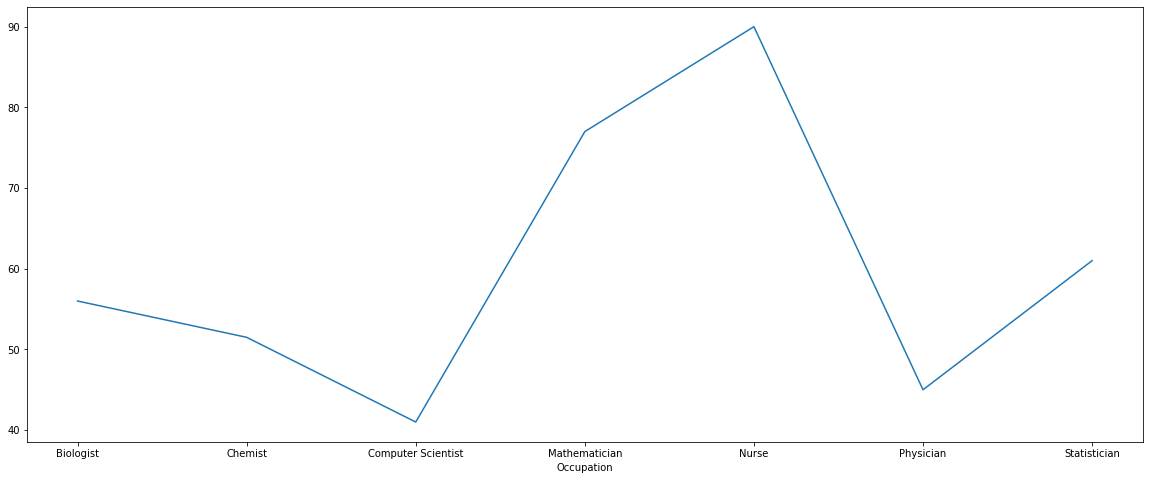

In [14]:
# 绘图
scientists_avg_age_by_occupation.plot(figsize=(20, 8))

# 总结
+ 能够进行 DataFrame 的条件查询操作
    + loc、query
+ 能够进行 DataFrame 的分组聚合操作
    + groupby、agg、aggragate
+ 能够进行 DataFrame 的排序操作
    + sort_values、sort_index
+ 能够使用 nlargest 和 nsmallest 函数
    + nlargest、nsmallest
+ 了解简单的 pandas 画图操作